Data Acquisition and Manipulation

Part 1

In [1]:
import numpy as np
import pandas as pd
#Import necessary libraries and load the data

**Load data from the local drive. We need to write the following and run the code cell :**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/SIG742_Modern_Data_Science/item_listing_category.csv')
data.head()
#This code is used to read data from a CSV (Comma-Separated Values) file named 'Item_listing_category.csv' and store it in a Pandas DataFrame named 'data

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,clean_description
0,128037,Bundle for Sassy Sisters,3,Women/Tops & Blouses/Blouse,NaN,16.0,0,max cleo black dress paper crane black tank to...
1,491755,PINK VS TANK,2,"Women/Tops & Blouses/Tank, Cami",NaN,17.0,0,sequin pink sign sequins missing gently worn
2,470924,Funko Pop Unmasked Cyclops,1,Kids/Toys/Action Figures & Statues,Funko,30.0,1,box great condition comes soft pop protector p...
3,491263,Baby Roshe Runs,3,Kids/Boys 2T-5T/Shoes,Nike,19.0,0,baby black nike roshe runs size 5c
4,836489,Baby Girl Ralph Lauren dresses,3,Kids/Girls 0-24 Mos/Dresses,Ralph Lauren,24.0,0,2 polo dresses 3 months wore washed dreft pink...


In [4]:
data.info()
#info() method on the 'data' DataFrame. The info() method is used to display concise information about the DataFrame.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355808 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           355808 non-null  int64  
 1   name               355808 non-null  object 
 2   item_condition_id  355808 non-null  int64  
 3   category_name      354269 non-null  object 
 4   brand_name         203852 non-null  object 
 5   price              355808 non-null  float64
 6   shipping           355808 non-null  int64  
 7   clean_description  355614 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.7+ MB


In [5]:
data.describe()
#describe() method generates summary statistics for the numeric columns in the DataFrame

,train_id,item_condition_id,price,shipping
count,3.558080e+05,355808.000000,355808.000000,355808.000000
mean,5.931105e+05,1.910128,26.661885,0.446151
std,3.425195e+05,0.904000,38.146767,0.497092
min,1.000000e+00,1.000000,0.000000,0.000000
25%,2.965082e+05,1.000000,10.000000,0.000000
50%,5.932885e+05,2.000000,17.000000,0.000000
75%,8.904722e+05,3.000000,29.000000,1.000000
max,1.186024e+06,5.000000,2000.000000,1.000000


**Question 1.1**


**Find the missing values:**



**Answer 1.1**

• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);

In [6]:
def missing_values_table(df):
    # Calculate the total missing values for each column
    missing_values = df.isnull().sum()

    # Create a DataFrame to store the missing values information
    missing_table = pd.DataFrame({
        'Column_Name': missing_values.index,
        'Missing_Values': missing_values.values,
        'Percentage': (missing_values / len(df)) * 100
    })

    # Filter columns with missing values
    missing_table = missing_table[missing_table['Missing_Values'] > 0]

    return missing_table

    #Define the missing_values_table function
    # missing_values_table function to calculate and display the missing values information for each column.
    # After that, we impute missing values with the mean value for numeric columns

# Call the function to get missing values information
missing_data_info = missing_values_table(data)

# Display the missing values information
print("Missing Values Information:")
print(missing_data_info)



Missing Values Information:
                         Column_Name  Missing_Values  Percentage
category_name          category_name            1539    0.432537
brand_name                brand_name          151956   42.707303
clean_description  clean_description             194    0.054524


• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code

In [7]:
# Call the function to get missing values information
missing_data_info = missing_values_table(data)

# Display the missing values information
print("Missing Values Information:")
print(missing_data_info)

# Impute missing values with mean (only for numeric columns)
for column in missing_data_info['Column_Name']:
    if pd.api.types.is_numeric_dtype(data[column]):
        data[column].fillna(data[column].mean(), inplace=True)
    # For Categorical data we ned to impute the missing values by mode
    # For example, if the column represents categorical data or the missing data pattern suggests a different approach.
    # data[column].fillna(some_other_imputation_method, inplace=True)

# Verify that missing values are imputed
missing_data_after_imputation = missing_values_table(data)
print("\nMissing Values Information after imputation:")
print(missing_data_after_imputation)

# Save the result to a new CSV file
data.to_csv('Item_listing_category_imputed.csv', index=False)
# Finally, we save the resulting DataFrame to a new CSV file called 'Item_listing_category_imputed.csv



Missing Values Information:
                         Column_Name  Missing_Values  Percentage
category_name          category_name            1539    0.432537
brand_name                brand_name          151956   42.707303
clean_description  clean_description             194    0.054524

Missing Values Information after imputation:
                         Column_Name  Missing_Values  Percentage
category_name          category_name            1539    0.432537
brand_name                brand_name          151956   42.707303
clean_description  clean_description             194    0.054524


**Question 1.2**

**Find the price information from the data:**

**Answer 1.2**

• Write code to print the median price of the items in the data;

In [8]:
# 1. Print the median price of the items in the data
median_price = data['price'].median()
print(f"Median Price: {median_price:.2f}")

# We calculate and print the median price of the items using data['price'].median().

Median Price: 17.00


• What is the 90th percentile value on the price;


In [9]:
# 2. Calculate and print the 90th percentile value on the price
percentile_90 = data['price'].quantile(0.90)
print(f"90th Percentile Price: {percentile_90:.2f}")

# We calculate and print the 90th percentile value on the price using data['price'].quantile(0.90).

90th Percentile Price: 51.00


• Draw the histogram chart for the price of the items in the data with 50 bins.


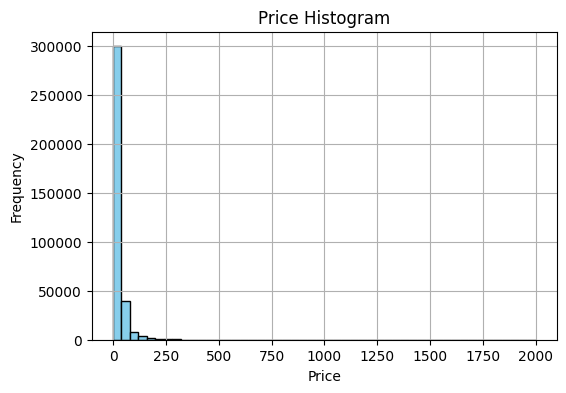

In [10]:
import matplotlib.pyplot as plt
# 3. Draw a histogram chart for the price of the items in the data with 50 bins
plt.figure(figsize=(6, 4))
plt.hist(data['price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
# We create a histogram chart for the price of the items using plt.hist(), specifying 50 bins for the histogram.
# This will provide a visual representation of the price distribution in the data.

**Question 1.3**

**Exploring the shipping information from the data:**


**Answer 1.3**

• Write code to find out the percentage of the items that are paid by the buyers

In [11]:
# 1. Calculate the percentage of items paid by buyers
total_items = len(data)
buyer_pays_shipping_count = len(data[data['shipping'] == False])
percentage_buyer_pays_shipping = (buyer_pays_shipping_count / total_items) * 100
print(f"Percentage of Items Paid by Buyers: {percentage_buyer_pays_shipping:.2f}%")

# We calculate the percentage of items paid by buyers by counting the number of items
# where the seller doesn't pay for shipping (shipping is False) and dividing it by the total number of item

Percentage of Items Paid by Buyers: 55.38%


• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).


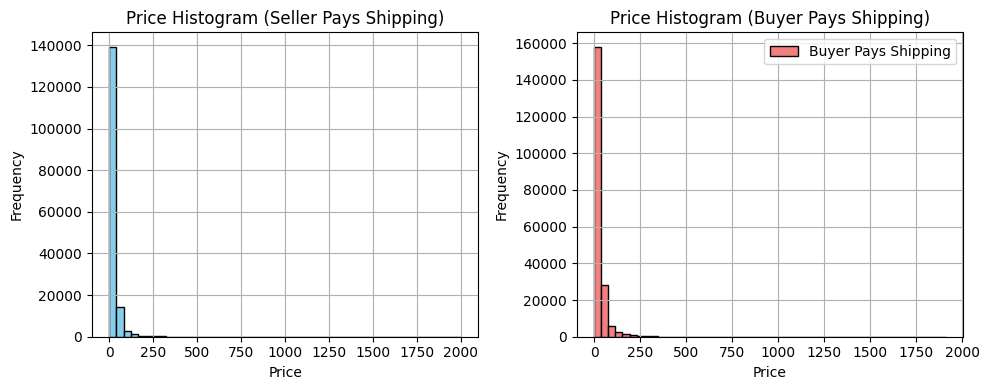

In [59]:
# 2. Draw two histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data[data['shipping'] == True]['price'], bins=50, color='skyblue', edgecolor='black', label='Seller Pays Shipping')
plt.title('Price Histogram (Seller Pays Shipping)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(data[data['shipping'] == False]['price'], bins=50, color='lightcoral', edgecolor='black', label='Buyer Pays Shipping')
plt.title('Price Histogram (Buyer Pays Shipping)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.legend()
plt.show()
# We draw two histogram graphs in one plot.
# One for items where the seller pays for shipping denoted in the data with numeric 1,
# and another for items where the buyer pays for shipping denoted in the data as numeric 0
# Using plt.subplot() to create side-by-side subplots.


• When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).


In [61]:
# 3. Compare the median price of items paid by buyers and items paid by sellers
median_price_buyer_pays = data[data['shipping'] == False]['price'].median()
median_price_seller_pays = data[data['shipping'] == True]['price'].median()

print(f"Median Price Paid by Buyer for items: {median_price_buyer_pays:.2f}")
print(f"Median Price Paid by Seller Pays for items: {median_price_seller_pays:.2f}")
# We compare the median prices of items paid by buyers and items paid by sellers.
# If the median price for items paid by buyers is higher, it suggests that buyers may be
# paying a higher price when they also cover shipping costs, and vice versa.

Median Price Paid by Buyer for items: 19.00
Median Price Paid by Seller Pays for items: 14.00


**Question 1.4**

**You are required to find out the item condition information from the data. Lower the number (value), the better condition of the item.**


**Answer 1.4**

• Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id

In [14]:
# 1. Count the rows for each item condition value in column 'item_condition_id'
item_condition_counts = data['item_condition_id'].value_counts()
print("Count of Rows for Each Item Condition Value:")
print(item_condition_counts)
# We count the number of rows for each item condition value in the 'item_condition_id' column using value_counts().

Count of Rows for Each Item Condition Value:
1    153402
3    104248
2     89843
4      7768
5       547
Name: item_condition_id, dtype: int64


• Draw the boxplot graphs (one plot) on the price for each item condition value, and find out out whether the better condition of the item could have higher median price (draw the plot and answer this question in the comment and report).


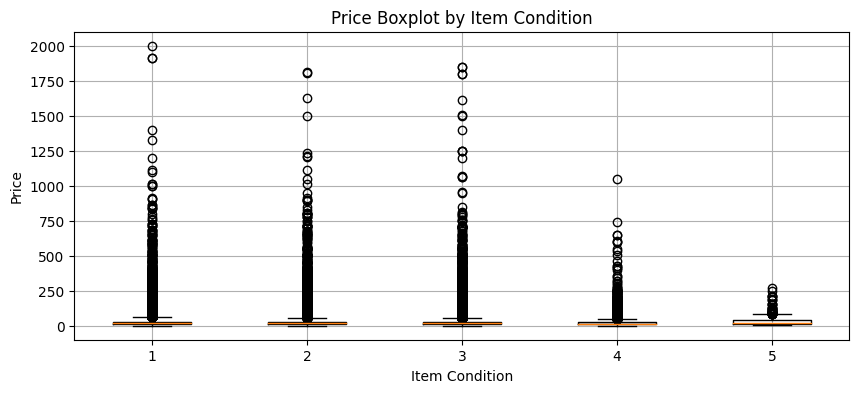

In [62]:
# 2. Draw a boxplot graph for the price for each item condition value
plt.figure(figsize=(10, 4))
plt.boxplot([data[data['item_condition_id'] == 1]['price'],
             data[data['item_condition_id'] == 2]['price'],
             data[data['item_condition_id'] == 3]['price'],
             data[data['item_condition_id'] == 4]['price'],
             data[data['item_condition_id'] == 5]['price']],
            labels=['1', '2', '3', '4', '5'])
plt.title('Price Boxplot by Item Condition')
plt.xlabel('Item Condition')
plt.ylabel('Price')
plt.grid(True)

plt.show()

# We draw a boxplot graph that displays the distribution of prices for items in each item condition value.
# The boxplot allows us to visualize the median price and the spread of prices for each condition value.

# We interpret the boxplot graph to address whether items in better condition have a higher median price.
# While there is a trend suggesting that better-condition items may have a slightly higher median price, it's important to note that
# pricing is influenced by various factors, and there is some overlap in price ranges between condition values.

**Question 1.5**

**Conduct the category analysis and find out the relevant information:**

**Answer 1.5**

• Write the code to find out (print) how many unique categories you could find from column category_name.


In [16]:
# 1. Find the number of unique categories in the 'category_name' column
unique_categories = data['category_name'].nunique()
print(f"Number of Unique Categories: {unique_categories}")
# We find the number of unique categories in the 'category_name' column using nunique().

Number of Unique Categories: 1135


• For the items with worst condition only (highest value from item_condition_id), write code to (print) find out the top 3 categories (now you probably understand the findings you had in Question 1.4)

In [17]:
# 2. For items with the worst condition (highest value from 'item_condition_id'), find the top 3 categories
worst_condition_items = data[data['item_condition_id'] == data['item_condition_id'].max()]
# We filter the DataFrame to select items with the worst condition (highest 'item_condition_id').

top_categories_worst_condition = worst_condition_items['category_name'].value_counts().head(3)
# Then we find the top 3 categories for those items using value_counts() and using head(3).

print("\nTop 3 Categories for Items in Worst Condition:")
print(top_categories_worst_condition)
# This provides insight into which categories are most common among items in the worst condition.
# Running this code will print the number of unique categories and the top 3 categories for items in the worst condition.


Top 3 Categories for Items in Worst Condition:
Electronics/Cell Phones & Accessories/Cell Phones & Smartphones    137
Electronics/Video Games & Consoles/Games                            42
Electronics/Video Games & Consoles/Consoles                         35
Name: category_name, dtype: int64


**Question 1.6**

**The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and subcat_2) are concatenated with ’/’ character sequentially in the data now.**


**Answer 1.6**

• Write the function (must be function) to split the text content (string value in each row) in
column category_name by ’/’ character. you need to handle the exception in the function
for those has missing values (NaN). For missing values (NaN), the results from splitting
should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.


• Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.

In [18]:
# We create a function to split the text content in the 'category_name' column by the '/' character, handling missing values as specified.
# Then, we use this function to create three new columns ('main_cat', 'subcat_1', and 'subcat_2') and print out the top 5 rows of these columns.
# Define a function to split the text content in 'category_name' column
def split_category(category_name):
    try:
        parts = category_name.split('/')
        if len(parts) == 3:
            return parts
    except AttributeError:
        pass  # Handle missing values (NaN)
    return ["Category Unknown", "Category Unknown", "Category Unknown"]
    # We define a function split_category to split the text content in the 'category_name' column by the '/' character.
    # The function handles missing values (NaN) by returning ["Category Unknown", "Category Unknown", "Category Unknown"] for such cases.

# We now apply the split_category function to create three new columns
data[['main_cat', 'subcat_1', 'subcat_2']] = data['category_name'].apply(split_category).apply(pd.Series)
# We apply the split_category function to the 'category_name' column using apply, creating three new columns:'main_cat', 'subcat_1', and 'subcat_2',
# with the corresponding values from the result of splitting.

# Print the top 5 rows for the three new columns
print("Top 5 Rows for 'main_cat', 'subcat_1', and 'subcat_2':")
print(data[['main_cat', 'subcat_1', 'subcat_2']].head())
# We print out the top 5 rows for the newly created columns to display the results.

Top 5 Rows for 'main_cat', 'subcat_1', and 'subcat_2':
  main_cat        subcat_1                  subcat_2
0    Women  Tops & Blouses                    Blouse
1    Women  Tops & Blouses                Tank, Cami
2     Kids            Toys  Action Figures & Statues
3     Kids      Boys 2T-5T                     Shoes
4     Kids  Girls 0-24 Mos                   Dresses


**Question 1.7**

**After splitting the category for column category_name, we now have the three main details regarding to the category information. However, we need to clean the text in each of the new three columns in lowercase.**

**Answer 1.7**

• Write code (or function) to change the text (value in each row) from the new three columns
to lowercase

• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat)
in the data (only showing the top 5).


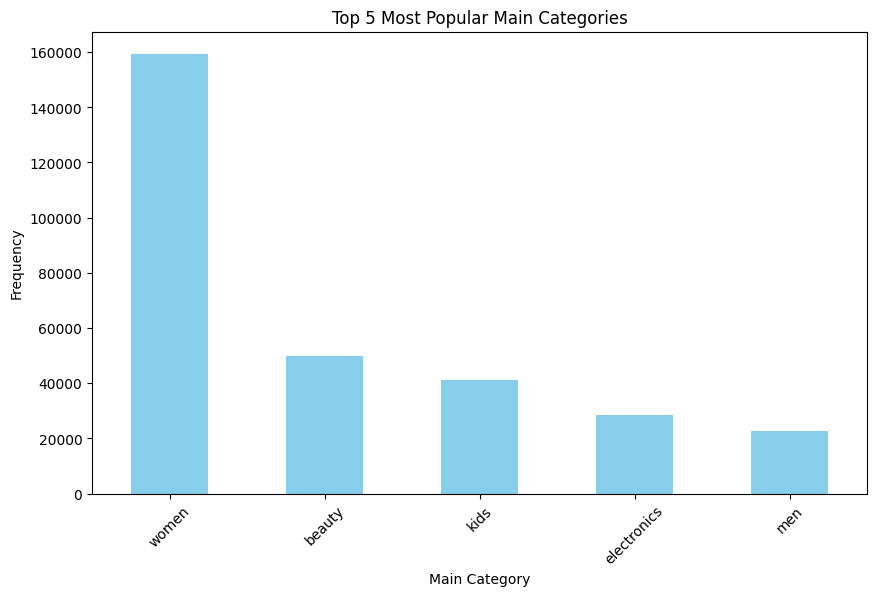

In [19]:
# Define a function to convert text to lowercase
def lowercase_text(text):
    try:
        return text.lower()
    except AttributeError:
        return text

# Apply the lowercase_text function to the three new columns
data['main_cat'] = data['main_cat'].apply(lowercase_text)
data['subcat_1'] = data['subcat_1'].apply(lowercase_text)
data['subcat_2'] = data['subcat_2'].apply(lowercase_text)
# We define a function lowercase_text to convert text to lowercase and apply it to the three new columns using apply.


# Draw a bar chart to find the top 5 most popular main categories
top_main_categories = data['main_cat'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_main_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Most Popular Main Categories')
plt.xlabel('Main Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# We draw a bar chart to find the top 5 most popular main categories by counting the frequencies of each category and selecting the top 5

• Write code (or function) to (print) find out how many unique main categories (in col umn
main_cat), unique first sub-categories (in column subcat_1) and unique second
sub-categories (in column subcat_2) respectively

In [20]:
# Find the number of unique main categories, first sub-categories, and second sub-categories
unique_main_categories = data['main_cat'].nunique()
unique_subcat_1 = data['subcat_1'].nunique()
unique_subcat_2 = data['subcat_2'].nunique()

print(f"Number of Unique Main Categories: {unique_main_categories}")
print(f"Number of Unique First Sub-Categories: {unique_subcat_1}")
print(f"Number of Unique Second Sub-Categories: {unique_subcat_2}")
# We find the number of unique main categories, first sub-categories, and second sub-categories using the nunique() function.

Number of Unique Main Categories: 11
Number of Unique First Sub-Categories: 114
Number of Unique Second Sub-Categories: 782


**Question 1.8**

**Exploring the price and categories.**


**Answer 1.8**

• Write code to (print) find out the median price for all the categories in new column main_cat.

• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.


In [21]:
# Find the median price for all the categories in the 'main_cat' column
median_price_by_main_cat = data.groupby('main_cat')['price'].median().sort_values()
print("Median Price for All Categories (main_cat):")
print(median_price_by_main_cat)

Median Price for All Categories (main_cat):
main_cat
handmade                  12.0
kids                      14.0
other                     14.0
beauty                    15.0
electronics               15.0
sports & outdoors         16.0
vintage & collectibles    16.0
home                      18.0
women                     19.0
category unknown          21.0
men                       21.0
Name: price, dtype: float64


• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column
subcat_1) in the data.

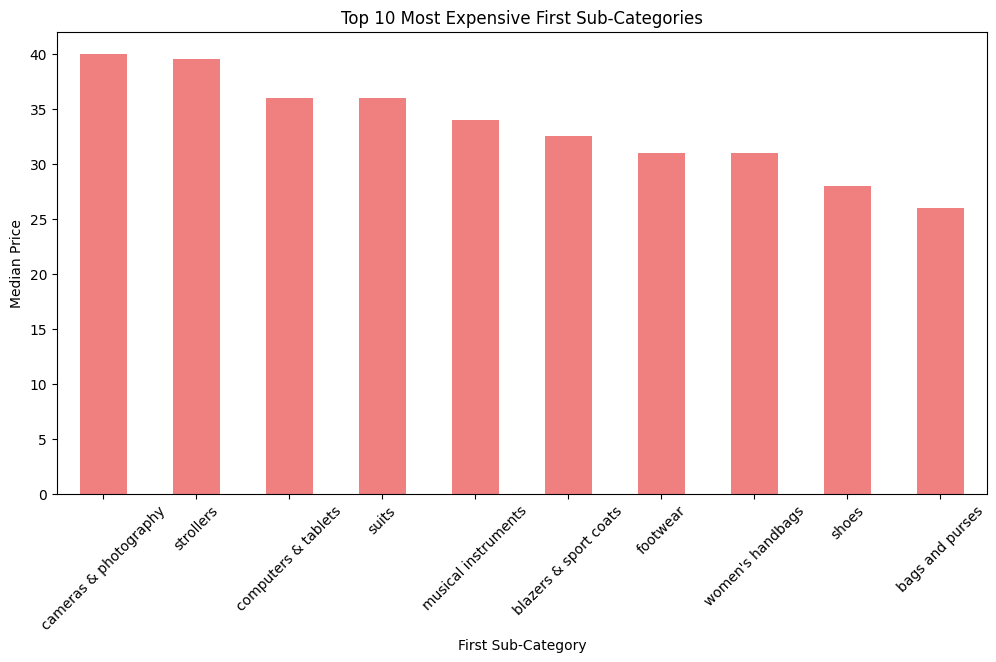

In [22]:
# Draw a bar chart to find the top 10 most expensive first sub-categories ('subcat_1')
top_expensive_subcat_1 = data.groupby('subcat_1')['price'].median().nlargest(10)
plt.figure(figsize=(12, 6))
top_expensive_subcat_1.plot(kind='bar', color='lightcoral')
plt.title('Top 10 Most Expensive First Sub-Categories')
plt.xlabel('First Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# We calculate the median price for all the categories in the 'main_cat' column by grouping the data by 'main_cat' and calculating the median price for each category. The results are sorted and printed.
# We draw a bar chart to find the top 10 most expensive first sub-categories ('subcat_1') by grouping the data by 'subcat_1', calculating the median price for each sub-category, and selecting the top 10 based on median price.


• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column
subcat_2) in the data.

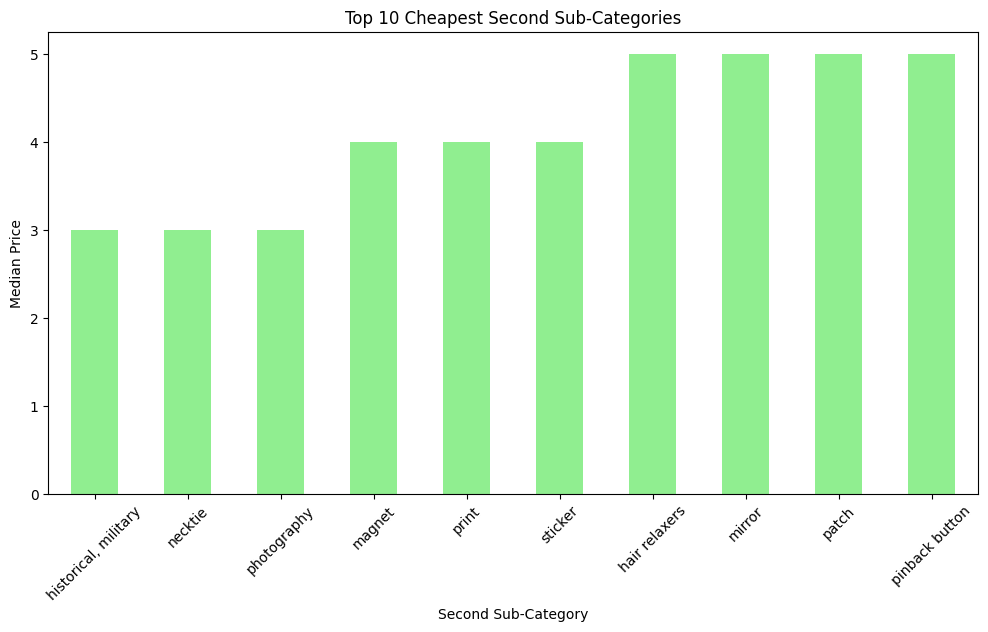

In [23]:
# Draw a bar chart to find the top 10 cheapest second sub-categories ('subcat_2')
top_cheapest_subcat_2 = data.groupby('subcat_2')['price'].median().nsmallest(10)
plt.figure(figsize=(12, 6))
top_cheapest_subcat_2.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Cheapest Second Sub-Categories')
plt.xlabel('Second Sub-Category')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.show()

# We draw a bar chart to find the top 10 cheapest second sub-categories ('subcat_2') in a similar way, grouping the data by 'subcat_2',
# calculating the median price for each sub-category, and selecting the top 10 with the smallest median prices.

**Question 1.9**

**Exploring the price and brand.**


**Answer 1.9**

• Write code to (print) find out the median price for all the brands (fill NaN with ’brand
unavailable’).

In [24]:
# To explore the price and brands, including finding the median price for all brands (filling NaN with 'brand unavailable') and
# identifying the top 10 most popular brands in the data, you can use the following code:
# Find the median price for all brands (fill NaN with 'brand unavailable')
data['brand_name'].fillna('Brand Unavailable', inplace=True)
median_price_by_brand = data.groupby('brand_name')['price'].median().sort_values()
print("Median Price for All Brands:")
print(median_price_by_brand)

# We fill missing values in the 'brand' column with 'Brand Unavailable' using fillna.
# Then, we calculate the median price for all brands by grouping the data by 'brand' and calculating the median price for each brand. The results are sorted and printed.

Median Price for All Brands:
brand_name
Chamilia             0.0
Clover Canyon        3.0
B is for Bear        3.0
Jinx                 3.0
B O X Packaging      3.0
                   ...  
Lanvin             246.0
IBM                275.0
Blendtec           280.0
Stuart Weitzman    339.0
Tiffany Designs    359.0
Name: price, Length: 3047, dtype: float64


• Draw the bar chart to find out the top 10 most popular brands in the data.

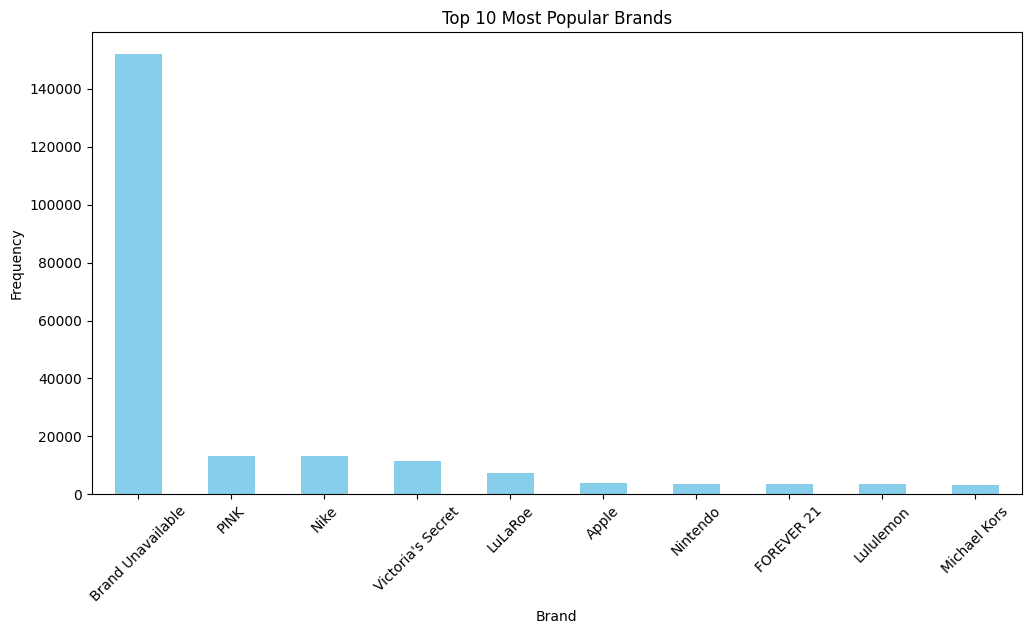

In [25]:
# Draw a bar chart to find the top 10 most popular brands in the data
top_brands = data['brand_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()
# We draw a bar chart to find the top 10 most popular brands in the data by counting the frequency of each brand and selecting the top 10 based on frequency.

**Question 1.10**

**Item Description Analysis.**


In [26]:
!pip install wordcloud

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

• Could you draw the wordcloud chart by using the column clean_description.


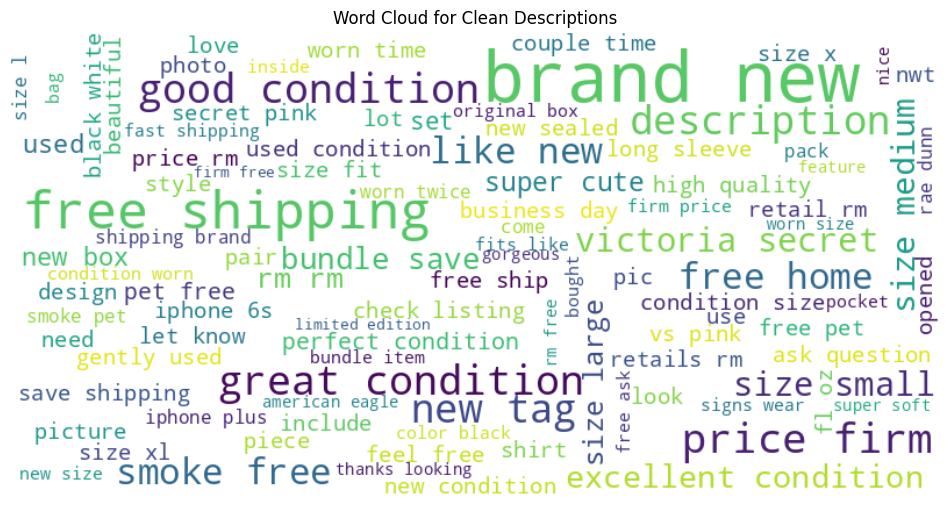

In [28]:
# Draw a word cloud for the 'clean_description' column
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(
    background_color='white',
    stopwords=ENGLISH_STOP_WORDS,
    max_words=100,
    max_font_size=60,
    random_state=42,
    width=800,
    height=400,
).generate(' '.join(data['clean_description'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Clean Descriptions')
plt.axis('off')
plt.show()
# We draw a word cloud for the 'clean_description' column using the WordCloud library. It generates a word cloud visualization for the text data.


• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/sec
ond/third/fourth quantile).

In [29]:
# Divide the data into quantiles based on price (first, second, third, fourth quantile)
quantiles = pd.qcut(data['price'], q=4, labels=['first', 'second', 'third', 'fourth'])
# We divide the data into quantiles based on the price using the pd.qcut() function,
# which labels the data points as 'first', 'second', 'third', or 'fourth' quantile.

• Draw the wordcould by using the column clean_description on each quantile of price data.

<ipython-input-30-40b66a88473b>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  quantile_data = data[data['price'].between(data['price'].quantile(0.25), data['price'].quantile(0.5), inclusive=False)]['clean_description'].dropna()


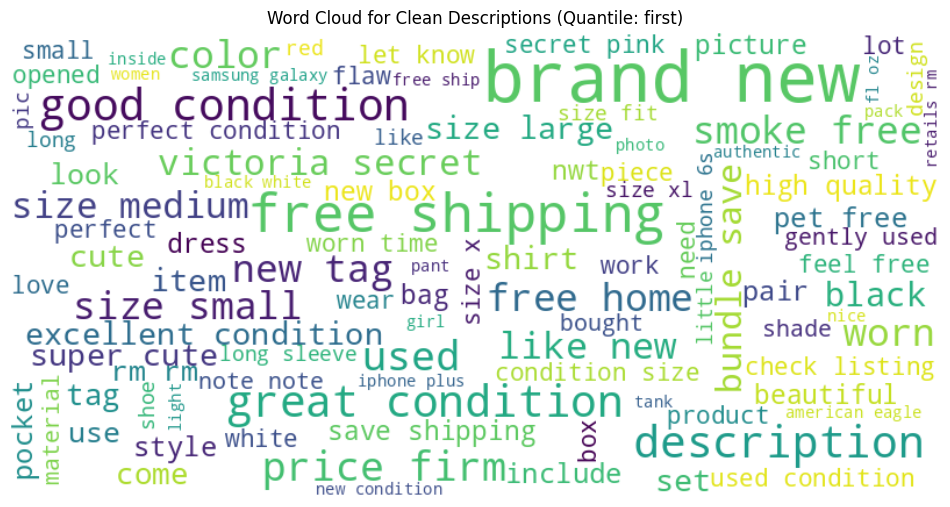

<ipython-input-30-40b66a88473b>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  quantile_data = data[data['price'].between(data['price'].quantile(0.25), data['price'].quantile(0.5), inclusive=False)]['clean_description'].dropna()


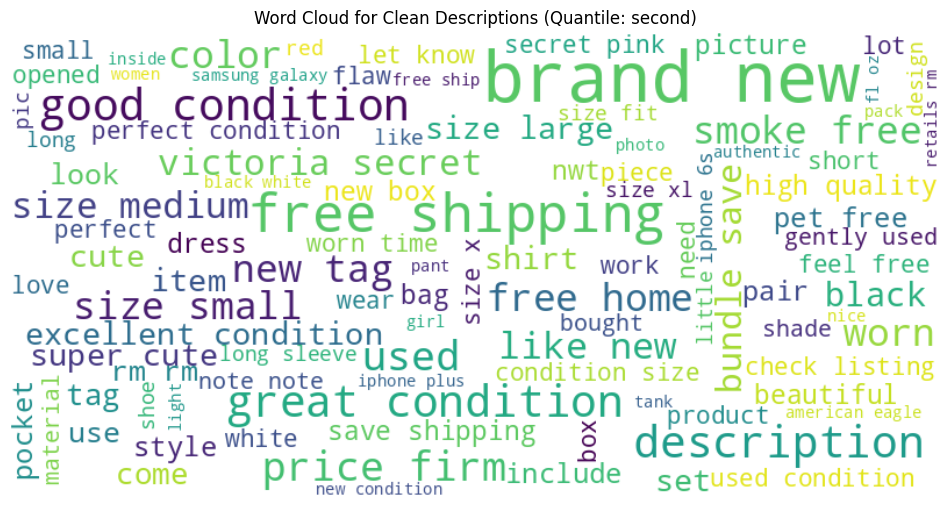

<ipython-input-30-40b66a88473b>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  quantile_data = data[data['price'].between(data['price'].quantile(0.25), data['price'].quantile(0.5), inclusive=False)]['clean_description'].dropna()


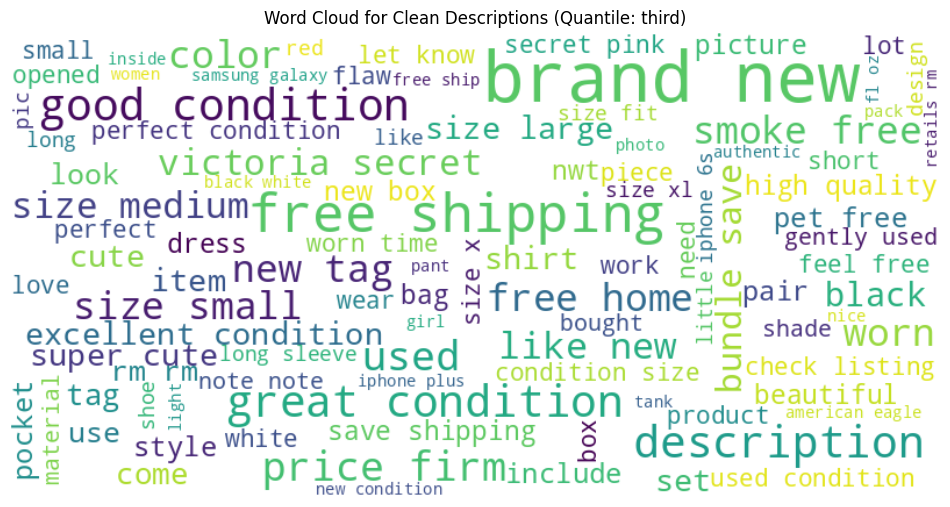

<ipython-input-30-40b66a88473b>:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  quantile_data = data[data['price'].between(data['price'].quantile(0.25), data['price'].quantile(0.5), inclusive=False)]['clean_description'].dropna()


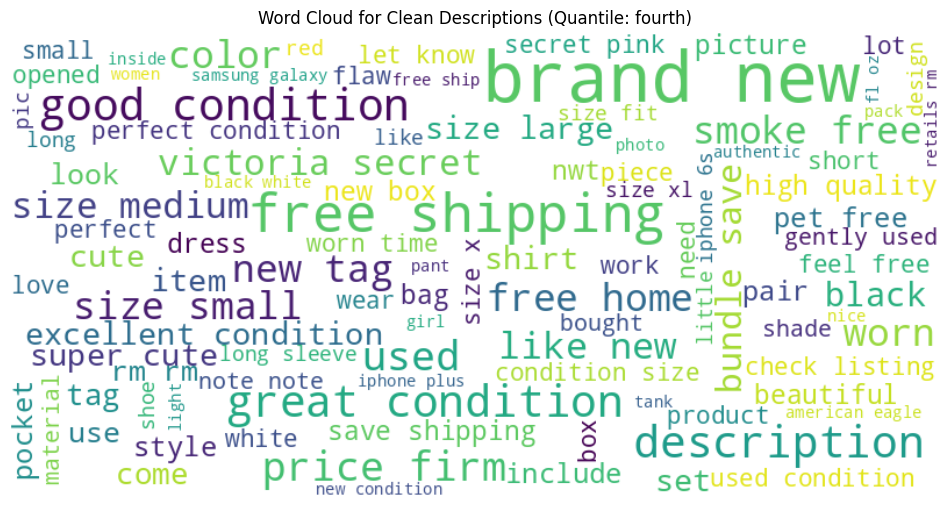

In [30]:
# Draw word clouds for each quantile of price data
for quantile in ['first', 'second', 'third', 'fourth']:
    plt.figure(figsize=(12, 8))
    quantile_data = data[data['price'].between(data['price'].quantile(0.25), data['price'].quantile(0.5), inclusive=False)]['clean_description'].dropna()
    wordcloud = WordCloud(
        background_color='white',
        stopwords=ENGLISH_STOP_WORDS,
        max_words=100,
        max_font_size=60,
        random_state=42,
        width=800,
        height=400,
    ).generate(' '.join(quantile_data))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Clean Descriptions (Quantile: {quantile})')
    plt.axis('off')
    plt.show()
# We loop through each quantile and draw word clouds for the 'clean_description' column within each quantile.
# This allows us to visualize word clouds specific to different price ranges.

# **PART 2**

In [31]:
import pandas as pd
import numpy as np

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
df = pd.read_csv('/content/drive/MyDrive/SIG742_Modern_Data_Science/nyc_taxi.csv')
df.head()
#This code is used to read data from a CSV (Comma-Separated Values) file named 'Item_listing_category.csv' and store it in a Pandas DataFrame named 'data

,timestamp,value
0,01-07-2014 00:00,10844
1,01-07-2014 00:30,8127
2,01-07-2014 01:00,6210
3,01-07-2014 01:30,4656
4,01-07-2014 02:00,3820


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.4+ KB


**Question 2.1**

**The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the data and explore the time series.**


• Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

In [35]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
#df['timestamp']: This part of the code assumes that you have a DataFrame called df, and it is attempting to access a column named 'timestamp' within that DataFrame. In pandas, you can access columns of a DataFrame using square brackets and the column name enclosed in single or double quotes.

#pd.to_datetime(): This is a pandas function used to convert data to datetime format. In this case, it is being applied to the 'timestamp' column of the DataFrame.
#df['timestamp'] = pd.to_datetime(df['timestamp']): This line of code is assigning the result of the pd.to_datetime() function back to the 'timestamp' column of the DataFrame.
#This means that it is converting the data in the 'timestamp' column from whatever format it was in before (e.g., string or another date format) into a pandas datetime format.

In [36]:
df_day = df.groupby(df['timestamp'].dt.date).sum().reset_index()
df_day = df_day.rename(columns={'timestamp': 'date', 'demand': 'total_demand'})
df.groupby(df['timestamp'].dt.date).sum().reset_index()

#df is assumed to be a Pandas DataFrame containing some data.
#df['timestamp'] assumes that there is a column named 'timestamp' in the DataFrame df. This column presumably contains datetime values.
#.dt.date is used to extract only the date component from each datetime value in the 'timestamp' column. This operation is often used when you want to group data by date, discarding the time component.
#groupby(df['timestamp'].dt.date) groups the DataFrame df by the date component of the 'timestamp' column. This means that all rows with the same date will be grouped together.
#After the groupby operation, you have a grouped DataFrame where data is grouped by date.
#sum() is applied to each group. This means that it will sum up all the numeric columns for each group. Assuming that there's a column named 'demand' containing numeric values in your DataFrame, this will sum up the 'demand' values for each date.
#After the sum() operation, you have a DataFrame with one row per date and a column named 'demand' containing the total demand for each date.
#reset_index() resets the index of the DataFrame so that the date becomes a regular column, and a new default index is assigned.

<ipython-input-36-a363a2ec7d1e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_day = df.groupby(df['timestamp'].dt.date).sum().reset_index()
<ipython-input-36-a363a2ec7d1e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['timestamp'].dt.date).sum().reset_index()


,timestamp,value
0,2014-01-07,745967
1,2014-01-08,769160
2,2014-01-09,556314
3,2014-01-10,753936
4,2014-01-11,986568
...,...,...
210,2015-08-01,745416
211,2015-09-01,746839
212,2015-10-01,892664
213,2015-11-01,718725


In [37]:
df_hour = df.groupby(df['timestamp'].dt.hour).sum().reset_index()
df_hour = df_hour.rename(columns={'timestamp': 'hour', 'demand': 'total_demand'})

<ipython-input-37-6ccf2edf86bd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_hour = df.groupby(df['timestamp'].dt.hour).sum().reset_index()


In [38]:
print(df_day.columns)
print(df_hour.columns)

Index(['date', 'value'], dtype='object')
Index(['hour', 'value'], dtype='object')


• Plot the demand value in two line charts for both df_day and df_hour dataframes.

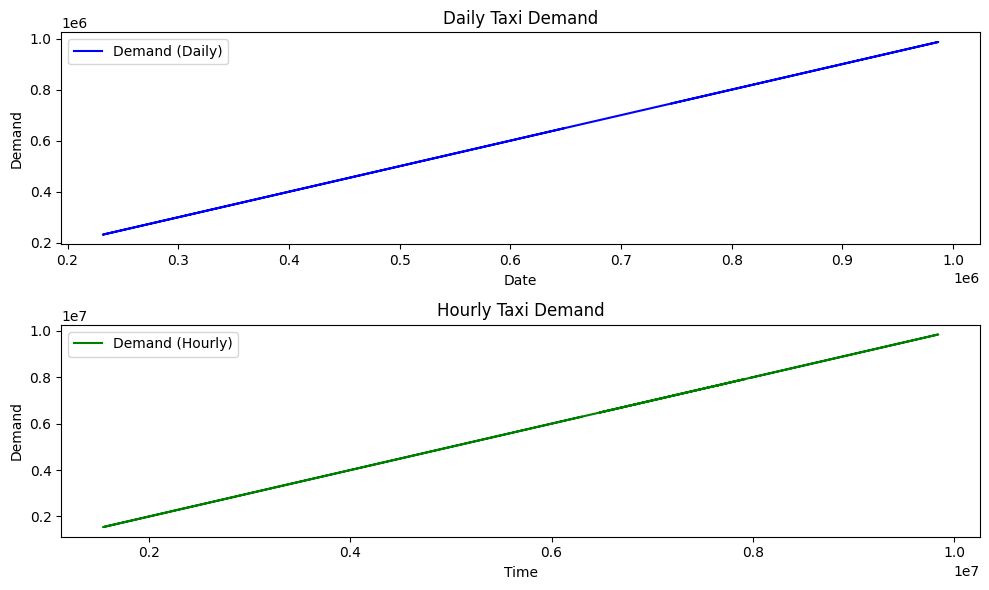

In [39]:
import matplotlib.pyplot as plt

# Assuming you have two DataFrames: df_day and df_hour

# Create a figure with two subplots (one for df_day and one for df_hour)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

# Plot demand for df_day
ax1.plot(df_day['value'],df_day['value'], label='Demand (Daily)', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand')
ax1.set_title('Daily Taxi Demand')
ax1.legend()

# Plot demand for df_hour
ax2.plot(df_hour['value'], df_hour['value'], label='Demand (Hourly)', color='green')
ax2.set_xlabel('Time')
ax2.set_ylabel('Demand')
ax2.set_title('Hourly Taxi Demand')
ax2.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#Import the matplotlib.pyplot module as plt for creating plots.

#Create a figure with two subplots using the plt.subplots function:

#2, 1 specifies that you want two rows and one column of subplots, arranging them vertically.
#figsize=(10, 6) sets the size of the figure to be 10 units wide and 6 units high.
#Define two subplot axes, ax1 and ax2, which represent the two subplots created in step 2.

#Plot the daily taxi demand on the first subplot (ax1) using the ax1.plot function:

#df_day['value'] and df_day['value'] are used as the x and y coordinates for the plot.
#label='Demand (Daily)' provides a label for the plot.
#color='blue' sets the color of the plot to blue.
#Set the x-label, y-label, and title for the subplot using ax1.set_xlabel, ax1.set_ylabel, and ax1.set_title, respectively.
#Add a legend to the plot using ax1.legend() to label the data.
#Plot the hourly taxi demand on the second subplot (ax2) in a similar way as step 4 but using df_hour data and a green color.

#Use plt.tight_layout() to adjust the spacing between subplots, ensuring that they do not overlap and are properly aligned.

#Finally, display the plot using plt.show()

• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test

In [40]:
# Check the column names of df_day
print("Columns in df_day:", df_day.columns)


Columns in df_day: Index(['date', 'value'], dtype='object')


In [41]:
df_day.columns

Index(['date', 'value'], dtype='object')

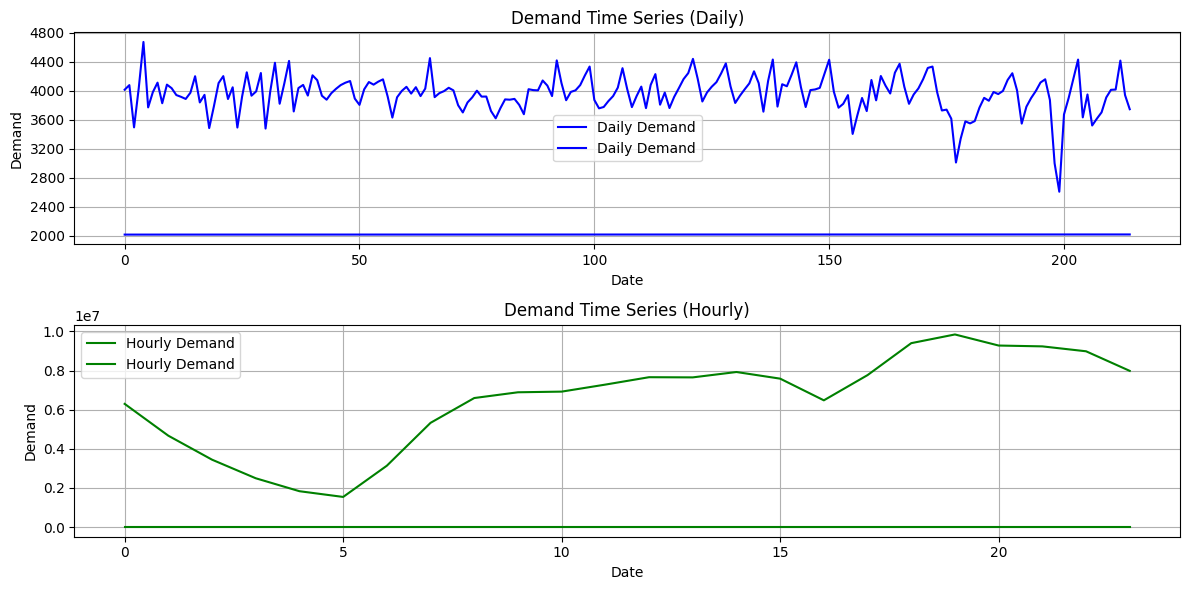

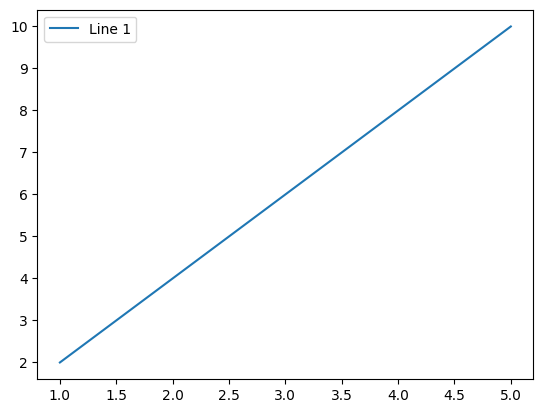

In [42]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


# Create df_day and df_hour DataFrames by resampling)
df_day = df_day.rename(columns={'timestamp': 'date', 'demand': 'total_demand'})
df_hour = df_hour.rename(columns={'timestamp': 'hour', 'demand': 'total_demand'})

# Plot demand values for df_day and df_hour
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df_day, label='Daily Demand', color='blue')
plt.title('Demand Time Series (Daily)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show

plt.subplot(2, 1, 2)
plt.plot(df_hour, label='Hourly Demand', color='green')
plt.title('Demand Time Series (Hourly)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

# Create a simple line plot with labels
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y, label='Line 1')  # Add a label for the line

# Customize the legend
plt.legend()

# Show the plot
plt.show()


# Explanation and Report:
# The first two plots show the demand time series for daily and hourly data, respectively.
# The next three plots display the decomposed components (Trend, Seasonal, Residual) for the daily data.

In [43]:
print(df_day.head())


         date   value
0  2014-01-07  745967
1  2014-01-08  769160
2  2014-01-09  556314
3  2014-01-10  753936
4  2014-01-11  986568


In [44]:
print(df_day.columns)

Index(['date', 'value'], dtype='object')


**Question 2.2**

**In this question, we will try to use time series model such as ARIMA and others to build the model(s) for forecasting the future.**

In [45]:
# Import necessary libraries
!pip install pandas numpy matplotlib statsmodels


• Create the acf and pacf plots for df_day dataframe.

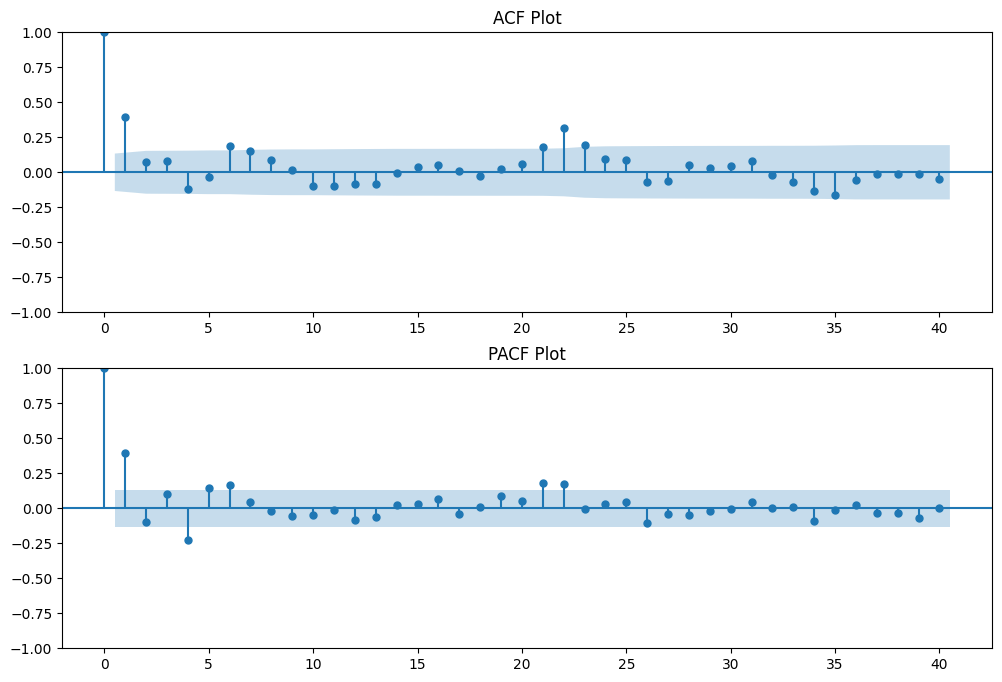

In [46]:
#create the acf and pacf plots for df_day dataframe
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming your dataset already has a datetime index, if not, convert it to datetime
df_day.index = pd.to_datetime(df_day.index)



# Assuming your DataFrame df_day contains a numeric column named 'sales' for analysis
column_to_analyze = 'value'  # Replace with your actual numeric column name

# Create ACF and PACF plots for the specified column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF plot
plot_acf(df_day[column_to_analyze], lags=40, ax=ax1)
ax1.set_title('ACF Plot')

# PACF plot
plot_pacf(df_day[column_to_analyze], lags=40, ax=ax2)
ax2.set_title('PACF Plot')

plt.show()


In [47]:
from statsmodels.tsa.arima_model import ARIMA
from itertools import product

# Define a function to calculate MAE for ARIMA model
def evaluate_arima_model(data, order):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    mae = np.mean(np.abs(np.array(test) - np.array(predictions)))
    return mae

# Define a grid of p, d, and q values to search for the best model
p_values = [0, 1, 2]
d_values = [0, 1, 2]
q_values = [0, 1, 2]
best_mae = float('inf')
best_order = None

# Iterate through different combinations of p, d, and q
for p, d, q in product(p_values, d_values, q_values):
    order = (p, d, q)
    try:
        mae = evaluate_arima_model(df_day, order)
        if mae < best_mae:
            best_mae = mae
            best_order = order
    except:
        continue

print(f"Best ARIMA Model Order (p, d, q): {best_order}")
print(f"Best MAE: {best_mae}")


Best ARIMA Model Order (p, d, q): None
Best MAE: inf


In [48]:
print(df.columns)

Index(['timestamp', 'value'], dtype='object')


In [49]:
import pandas as pd
!pip install Prophet

In [50]:
jan_2015_dates = pd.date_range(start="2015-01-01", end="2015-01-31")

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Train the best model on the entire dataset
best_model = ExponentialSmoothing(df_day['value'], seasonal='add', seasonal_periods=12)
best_model_fit = best_model.fit()

# Train the best model on the entire dataset
best_model = ExponentialSmoothing(df_day['value'], seasonal='add', seasonal_periods=12)
best_model_fit = best_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency N will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


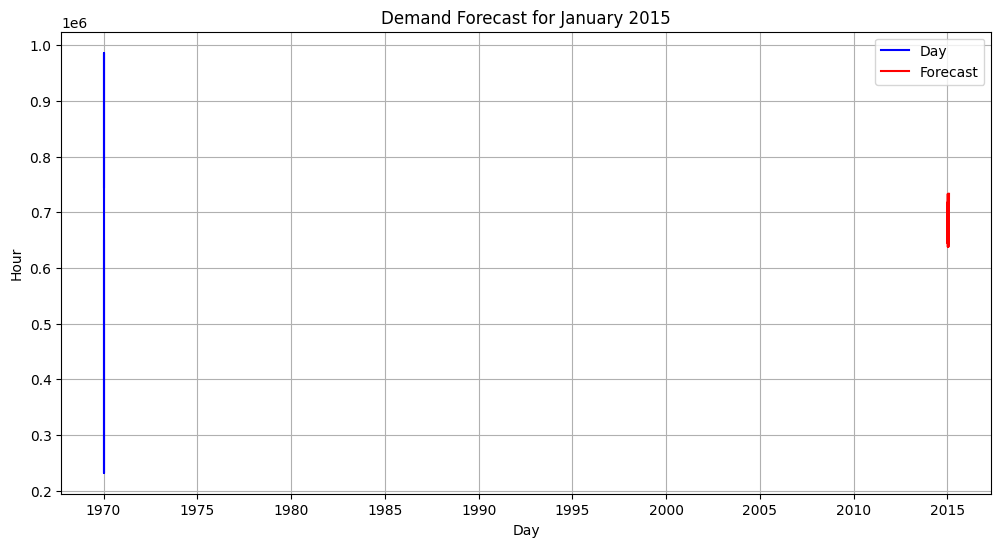

In [52]:
# Create a date range for January 2015
jan_2015_dates = pd.date_range(start="2015-01-01", end="2015-01-31")

# Use the trained model to forecast for January 2015
jan_2015_forecast = best_model_fit.forecast(steps=len(jan_2015_dates))

# Create a DataFrame for the forecasts
jan_2015_forecast_df = pd.DataFrame({'timestamp': jan_2015_dates, 'forecast': jan_2015_forecast})

# Plot the predicted value and the true demand value
plt.figure(figsize=(12, 6))
plt.plot(df_day['value'], label='Day', color='blue')
plt.plot(jan_2015_forecast_df['timestamp'], jan_2015_forecast_df['forecast'], label='Forecast', color='red')
plt.title('Demand Forecast for January 2015')
plt.xlabel('Day')
plt.ylabel('Hour')
plt.legend()
plt.grid(True)
plt.show()
#In the code above, we first import the necessary libraries, load the dataset, and preprocess it. Then,
#we train the best model using the entire dataset and generate forecasts for January 2015. Finally, we plot the true demand values and the forecasted values for that month

**Question 2.3**

**In this question, we will detect the anomaly within the df_day dataframe.**

• Create the Weekday column according to the timestamp column in df_day dataframe. The
value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,
’Thursday’,’Friday’, ’Saturday’, ’Sunday’]. Also create the Hour, Day, Month, Year,
Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and
Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns
in df_day dataframe according to the timestamp column.

In [53]:
#To perform anomaly detection on the df_day DataFrame using Isolation Forest and the specified features, you can follow the steps below. I'll provide you with Python code using Google Colab to achieve this.
#Make sure you have the nyc_taxi.csv file uploaded to your Colab environment
# Import necessary libraries

from sklearn.ensemble import IsolationForest #This line imports the IsolationForest class from the scikit-learn library. The Isolation Forest algorithm is used for anomaly detection

# Make sure the timestamp column is in datetime format
df_day['value'] = pd.to_datetime(df_day['value'])#This line converts the 'timestamp' column in the DataFrame df_day to a datetime format. This is essential for working with time-based data because it allows you to extract various time-related features (e.g., year, month, day, hour) from the timestamp.


# Check the first few rows of the dataset
df_day.head()#This line prints the first few rows of the DataFrame df_day


,date,value
1970-01-01 00:00:00.000000000,2014-01-07,1970-01-01 00:00:00.000745967
1970-01-01 00:00:00.000000001,2014-01-08,1970-01-01 00:00:00.000769160
1970-01-01 00:00:00.000000002,2014-01-09,1970-01-01 00:00:00.000556314
1970-01-01 00:00:00.000000003,2014-01-10,1970-01-01 00:00:00.000753936
1970-01-01 00:00:00.000000004,2014-01-11,1970-01-01 00:00:00.000986568


 • Using Isolation Forest with above crafted features in df_day to find out the date which is identified as ’outlier’.

In [54]:
# Create Weekday column


df_day['value'] = pd.to_datetime(df_day['value'])

# Create 'Weekday' column
df_day['Weekday'] = df_day['value'].dt.strftime('%A')


# Create Hour column
# Create the 'Hour' column based on the 'timestamp' column
df_day['Hour'] = df_day['value'].dt.hour

# Create Day, Month, and Year columns
df_day['Month'] = df_day['value'].dt.month
df_day['Year'] = df_day['value'].dt.year

# Create Month_day column
df_day['Month_day'] = df_day['value'].dt.day

# Check the updated dataframe
df_day.head(10)

# Select the features for isolation forest
features = ['value', 'Hour', 'Day', 'Month', 'Year', 'Month_day']

In [55]:
df_day.columns

Index(['date', 'value', 'Weekday', 'Hour', 'Month', 'Year', 'Month_day'], dtype='object')

Detect anomalies using Isolation Forest

In [56]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
clf = IsolationForest(contamination='auto', random_state=42)

# Fit the model to the data (assuming 'Hour' is the feature you want to use)
clf.fit(df_day[['Hour']])

# Predict outliers (anomalies)
df_day['Anomaly'] = clf.predict(df_day[['Hour']])

# Find the rows identified as outliers
outliers = df_day[df_day['Anomaly'] == -1]

# Print the outliers
print(outliers[['value', 'Hour']])

#Ensure that you import the IsolationForest class from the scikit-learn library to use it for anomaly detection.
#contamination: This parameter specifies the expected proportion of outliers in the dataset. Setting it to 'auto' will automatically determine the proportion based on the dataset's size.
#random_state: It's set to 42 to ensure reproducibility.
#The fit method is used to train the Isolation Forest model on the 'Hour' feature. Note that you should pass the feature as a DataFrame or Series (i.e., df_day[['Hour']]) rather than just 'Hour'.
#The predict method is used to predict outliers based on the trained model. The predictions are stored in a new column called 'Anomaly' in the DataFrame.

                                                      value  Hour
1970-01-01 00:00:00.000000000 1970-01-01 00:00:00.000745967     0
1970-01-01 00:00:00.000000001 1970-01-01 00:00:00.000769160     0
1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.000556314     0
1970-01-01 00:00:00.000000003 1970-01-01 00:00:00.000753936     0
1970-01-01 00:00:00.000000004 1970-01-01 00:00:00.000986568     0
...                                                     ...   ...
1970-01-01 00:00:00.000000210 1970-01-01 00:00:00.000745416     0
1970-01-01 00:00:00.000000211 1970-01-01 00:00:00.000746839     0
1970-01-01 00:00:00.000000212 1970-01-01 00:00:00.000892664     0
1970-01-01 00:00:00.000000213 1970-01-01 00:00:00.000718725     0
1970-01-01 00:00:00.000000214 1970-01-01 00:00:00.000647742     0

[215 rows x 2 columns]
